## Multi-Arm Bandit Experiment - Bayesian A/B Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [25]:
Num_Trials = 2500
Bandit_Prob = [0.1, 0.25, 0.4, 0.5, 0.75, 0.9]

In [3]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.alpha = 1
        self.beta = 1
        
    def pull(self):
        return np.random.random() < self.p 
    
    def sample(self):
        return np.random.beta(self.alpha, self.beta)
    
    def update_param(self, z):
        self.alpha += z
        self.beta += 1-z
    


In [22]:
def plot(bandits, trial):
        x = np.linspace(0, 1, 250)
        for b in bandits:
            y = beta.pdf(x, b.alpha, b.beta)
            plt.plot(x, y, label="real prob - {}".format(b.p))
        plt.title("Bandit Distribution after {} trials".format(trial))
        plt.legend()
        plt.show()
        

In [23]:
def ab_experiment():
        bandits = [Bandit(p) for p in Bandit_Prob]
        
        sample_pts = [10, 50, 100, 200, 500, 1000, 1500, 2000, 2499]
        for i in range(Num_Trials):
            best_bandit = None
            max_sample = -1
            all_samples = []
            for b in bandits:
                sample = b.sample()
                all_samples.append("{:.4f}".format(sample))
                if sample > max_sample:
                    max_sample = sample
                    best_bandit = b 
            if i in sample_pts:
                print("current sample: %s" % all_samples)
                plot(bandits, i)
                
            z = best_bandit.pull()
            best_bandit.update_param(z)
        
        

current sample: ['0.3875', '0.4237', '0.1191', '0.9144', '0.5122', '0.8422']


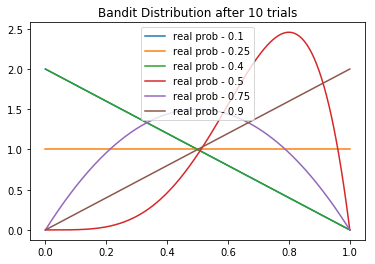

current sample: ['0.0674', '0.0941', '0.2838', '0.5510', '0.6742', '0.8679']


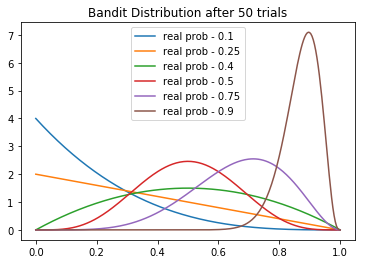

current sample: ['0.0339', '0.1116', '0.7657', '0.3778', '0.6300', '0.8928']


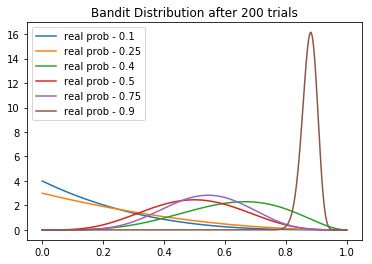

current sample: ['0.2490', '0.7086', '0.7033', '0.4045', '0.6042', '0.9062']


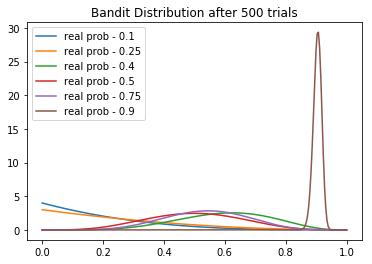

current sample: ['0.1727', '0.0042', '0.9157', '0.4988', '0.5354', '0.9223']


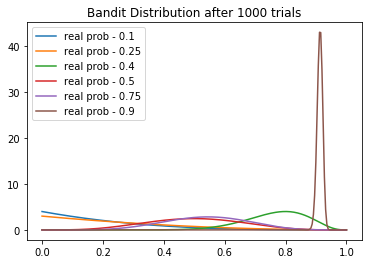

current sample: ['0.0081', '0.1871', '0.7478', '0.6005', '0.6114', '0.9186']


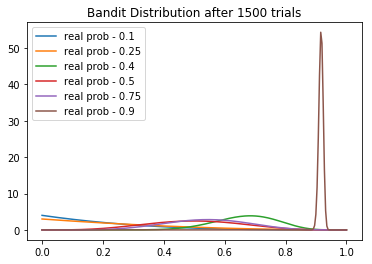

current sample: ['0.4240', '0.1929', '0.6683', '0.2847', '0.6189', '0.8994']


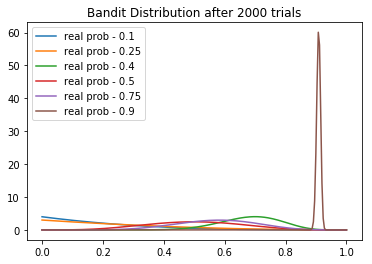

current sample: ['0.0213', '0.4931', '0.7097', '0.2665', '0.4586', '0.9049']


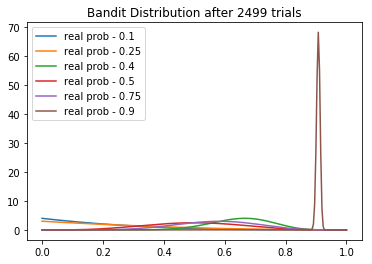

In [26]:
if __name__ == '__main__':
    ab_experiment()